# **Step-1:** Importing Required Libraries

In [1]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob 
import cv2 
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.xception import Xception
from sklearn.ensemble import VotingClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step-2:** Performing Preprocessing

In [4]:
import sklearn
from sklearn.model_selection import train_test_split

#Capture training data and labels into respective lists
images = []
labels = []



for directory_path in glob.glob("/content/drive/MyDrive/NIT Durgapur Internship 3/Dataset_Modified/*"):
   data_split=os.path.split(directory_path)
   label=data_split[-1]
   print(label)
   for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img=np.asarray(img)
        img=(img/126.5)
        images.append(img)
        labels.append(label)
        
        
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, train_size = 0.7, random_state=1, shuffle = True)



Hand
BreastMRI
ChestCT
CXR
AbdomenCT
HeadCT


In [5]:
#Convert lists to arrays                
test_images = np.array(X_test)
test_labels = np.array(Y_test)


In [6]:
train_images = np.array(X_train)
train_labels = np.array(Y_train)


In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [8]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [9]:
y_train[10:20]

array([2, 0, 3, 2, 0, 4, 3, 3, 3, 2])

In [10]:
x_train.shape

(18914, 128, 128, 3)

In [11]:
 # Normalize pixel values to between 0 and 1

In [11]:
labels=np.unique(y_test)
labels

array([0, 1, 2, 3, 4, 5])

In [13]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# **Step-3:** Feature Extraction using Xception Model

In [14]:
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(128,128, 3))

In [15]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in xception_model.layers:
	layer.trainable = False
    
xception_model.summary()  #Trainable parameters will be 0

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [16]:
#Now, let us use features from convolutional network for RF
feature_extractor_xception=xception_model.predict(x_train)

592/592 [==============================] - 122s 204ms/step


In [17]:
fe_xception_test=xception_model.predict(x_test)


254/254 [==============================] - 51s 199ms/step


In [18]:
features_xception = feature_extractor_xception.reshape(feature_extractor_xception.shape[0], -1)

In [19]:
f_xception_test= fe_xception_test.reshape(fe_xception_test.shape[0],-1)

In [20]:
print(f_xception_test.shape)

(8106, 32768)


# **Step-4:** Classifications using Machine Learning Models

## **Step-4.1:** Classification using K-Nearest Neighbours

In [27]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
knn = KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.fit(features_xception , y_train)


KNeighborsClassifier(n_neighbors=10)

In [25]:
y_pred=knn.predict(f_xception_test)

In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score

In [27]:
print ("Accuracy = ", metrics.accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred,average='weighted'))
print("Recall =",recall_score(y_test,y_pred,average='weighted'))
print("F_1 =", f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.998272884283247
Precision = 0.9982742468612263
Recall = 0.998272884283247
F_1 = 0.9982730608040165


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1334,    0,    0,    4,    0,    0],
       [   0, 1370,    0,    0,    0,    0],
       [   0,    0, 1323,    0,    2,    1],
       [   4,    0,    0, 1343,    0,    0],
       [   0,    0,    0,    0, 1394,    0],
       [   2,    1,    0,    0,    0, 1328]])

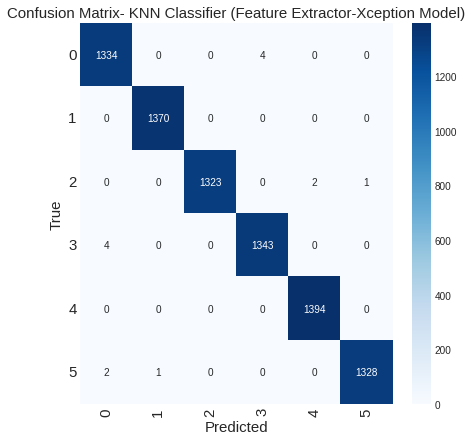

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- KNN Classifier (Feature Extractor-Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_KNN.png')
plt.show()

## **Step-4.2:** Classification using Logistic Regression

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
# define the multinomial logistic regression model
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
lrm.fit(features_xception , y_train)


In [ ]:
y_pred_lr=lrm.predict(f_xception_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test,y_pred_lr))
print("Precision =", precision_score(y_test,y_pred_lr,average='weighted'))
print("Recall =",recall_score(y_test,y_pred_lr,average='weighted'))
print("F_1 =", f1_score(y_test,y_pred_lr, average='weighted'))

In [ ]:
cm = confusion_matrix(y_test,y_pred_lr)
cm

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Logistic Regressor (Feature Extractor-Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_LR.png')
plt.show()

## **Step-4.3:** Classification using Random Forest

In [31]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [22]:
# Train the model on training data
RF_model.fit(features_xception, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [23]:
print(RF_model.score(features_xception, y_train))

1.0


In [24]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(f_xception_test)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score

In [27]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))
print("Precision =", precision_score(test_labels,prediction_RF,average='weighted'))
print("Recall =",recall_score(test_labels,prediction_RF,average='weighted'))
print("F_1 =", f1_score(test_labels,prediction_RF,average='weighted'))

Accuracy =  0.9985196150999259
Precision = 0.9985220869152773
Recall = 0.9985196150999259
F_1 = 0.9985198864288214


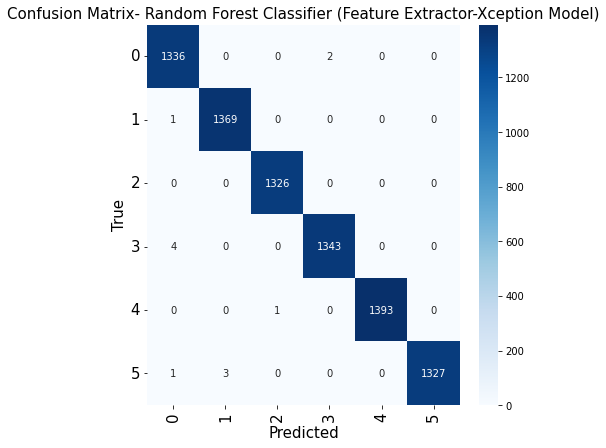

In [28]:
cm = confusion_matrix(test_labels,prediction_RF)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Random Forest Classifier (Feature Extractor-Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_RandomForest.png')
plt.show()

## **Step-4.4:** Classification using XGBoost




In [ ]:
!pip install xgboost

In [32]:
import xgboost as xgb

In [ ]:
#xgb_classifier = xgb.XGBClassifier(tree_method = "gpu_hist")

In [33]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(features_xception, y_train)

In [ ]:
predictions = xgb_classifier.predict(f_xception_test)
prediction_XG = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_XG))

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_XG))
print("Precision =", precision_score(test_labels, prediction_XG,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_XG,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_XG,average='wighted'))

In [ ]:
### Confusion Matrix
cm = confusion_matrix(test_labels, prediction_XG)
import seaborn as sns
import matplotlib.pyplot as plt


class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- XGBoost Classifier(Feature Extractor-Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_XGBoost.png')
plt.show()

## **Step-4.5:** Classification using LightGBM


In [34]:
import lightgbm as lgb

In [35]:
lightgbm_classifier =lgb.LGBMClassifier()

In [ ]:
lightgbm_classifier.fit(features_xception, y_train)

In [ ]:
predictions = lightgbm_classifier.predict(f_xception_test)
prediction_lightgbm = le.inverse_transform(predictions)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_lightgbm))
print("Precision =", precision_score(test_labels, prediction_lightgbm,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_lightgbm,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_lightgbm,average='weighted'))

In [ ]:
cm = confusion_matrix(test_labels, prediction_lightgbm)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- LightGBM Classifier(Feature Extractor-Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_LightGBM.png')
plt.show()

## **Step-4.6:** Classification using SVC- Support Vector Classifier

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC(C=0.65, random_state=0, kernel='rbf')

In [ ]:
svc.fit(features_xception, y_train)

In [ ]:
predictions = svc.predict(f_xception_test)
prediction_SVC = le.inverse_transform(predictions)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVC))
print("Precision =", precision_score(test_labels, prediction_SVC,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_SVC,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_SVC,average='weighted'))

In [ ]:
cm = confusion_matrix(test_labels, prediction_SVC)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- SVC (Feature Extractor-Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_SVC.png')
plt.show()

## **Step-5:** TSNE (t-Distributed Stochastic Neighbour Embedding)



In [21]:
import numpy as np
from sklearn.manifold import TSNE
#>>> X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(features_xception)
X_embedded.shape

(18914, 3)

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

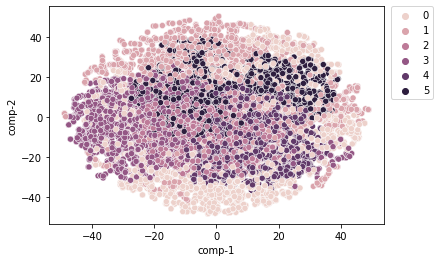

In [25]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/TSNE_Train_data_with_xception.png')
plt.show()

## **Step-6:** Classification using Ensemble Model

### Ensemble Model-1


In [ ]:
final_model = VotingClassifier(estimators=[('rf', RF_model), ('xgb', xgb_classifier),('knn',knn),('svc',svc),('lr',lrm)], voting='hard')
 

In [ ]:
final_model.fit(features_xception, y_train)

In [ ]:
predictions = final_model.predict(f_xception_test) # X_test_features
prediction_final = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_final,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_final,average='weighted'))

In [ ]:
print("Accuracy =",accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average=None))
print("Recall =",recall_score(test_labels, prediction_final,average=None))
print("F_1 =", f1_score(test_labels, prediction_final,average=None))

In [ ]:
### Confusion Matrix
cm = confusion_matrix(test_labels, prediction_final)
import seaborn as sns
import matplotlib.pyplot as plt

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Ensemble (Feature Extractor -Xception Model)', fontsize=15)
plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_Ensemble.png')
plt.show()

### Ensemble Model-2

In [38]:
final_model_2 = VotingClassifier(estimators=[('rf', RF_model), ('lgbm', lightgbm_classifier),('knn',knn),('svc',svc),('lr',lrm)], voting='hard')


In [ ]:
final_model_2.fit(features_xception, y_train)

In [ ]:
predictions = final_model_2.predict(f_xception_test) # X_test_features
prediction_final = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_final,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_final,average='weighted'))

In [ ]:
print("Accuracy =",accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average=None))
print("Recall =",recall_score(test_labels, prediction_final,average=None))
print("F_1 =", f1_score(test_labels, prediction_final,average=None))

In [ ]:
cm = confusion_matrix(test_labels, prediction_final)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Ensemble (Feature Extractor -Xception Model)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/Xception_Ensemble_2.png')
plt.show()